In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology


In [14]:
# Cargar las imágenes
img1 = cv2.imread('Data/3.jpg')
img2 = cv2.imread('Data/4.jpg')

# Convertir las imágenes a escala de grises
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



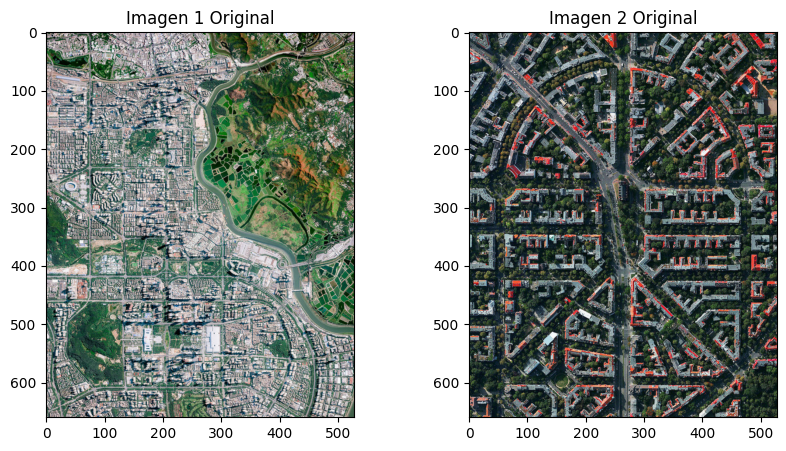

In [15]:
# Mostrar las imágenes originales
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Imagen 1 Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Imagen 2 Original')

plt.show()

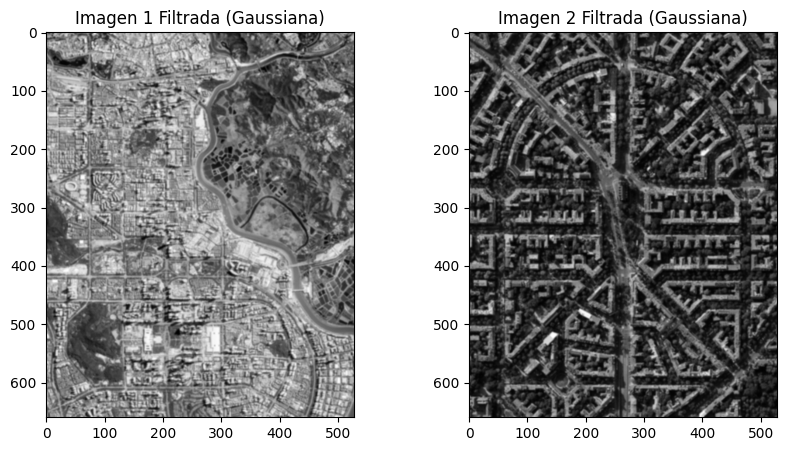

In [16]:
# 1. Filtrado para eliminar ruido y mejorar calidad
filtered_img1 = cv2.GaussianBlur(gray_img1, (5, 5), 0)
filtered_img2 = cv2.GaussianBlur(gray_img2, (5, 5), 0)

# Mostrar imágenes filtradas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_img1, cmap='gray')
plt.title('Imagen 1 Filtrada (Gaussiana)')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img2, cmap='gray')
plt.title('Imagen 2 Filtrada (Gaussiana)')

plt.show()

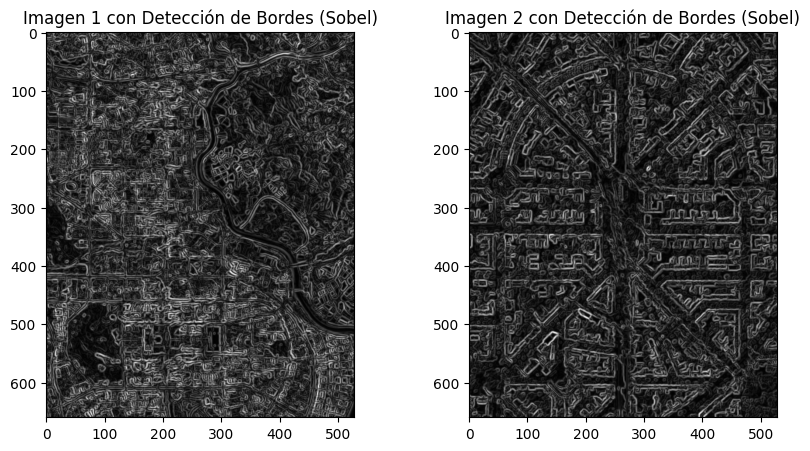

In [17]:
# 2. Detección de bordes usando Sobel
edges_img1 = filters.sobel(filtered_img1)
edges_img2 = filters.sobel(filtered_img2)

# Mostrar imágenes con detección de bordes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(edges_img1, cmap='gray')
plt.title('Imagen 1 con Detección de Bordes (Sobel)')

plt.subplot(1, 2, 2)
plt.imshow(edges_img2, cmap='gray')
plt.title('Imagen 2 con Detección de Bordes (Sobel)')

plt.show()

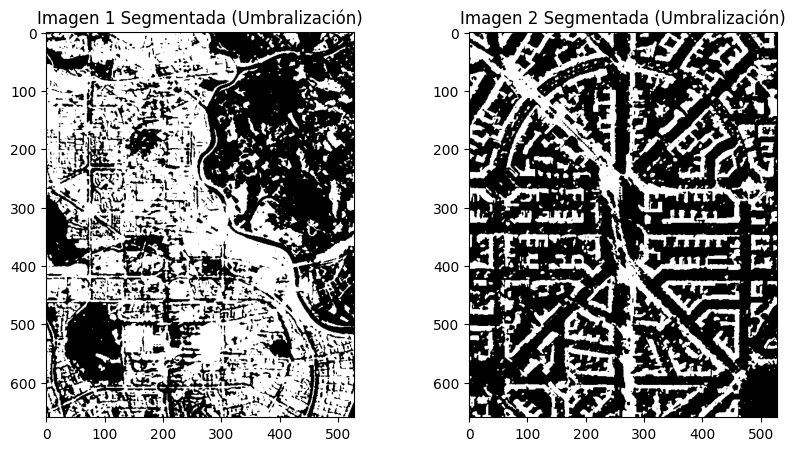

In [18]:
# 3. Segmentación usando umbralización
thresh_img1 = filters.threshold_otsu(filtered_img1)
thresh_img2 = filters.threshold_otsu(filtered_img2)

binary_img1 = filtered_img1 > thresh_img1
binary_img2 = filtered_img2 > thresh_img2

# Mostrar segmentación
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_img1, cmap='gray')
plt.title('Imagen 1 Segmentada (Umbralización)')

plt.subplot(1, 2, 2)
plt.imshow(binary_img2, cmap='gray')
plt.title('Imagen 2 Segmentada (Umbralización)')

plt.show()

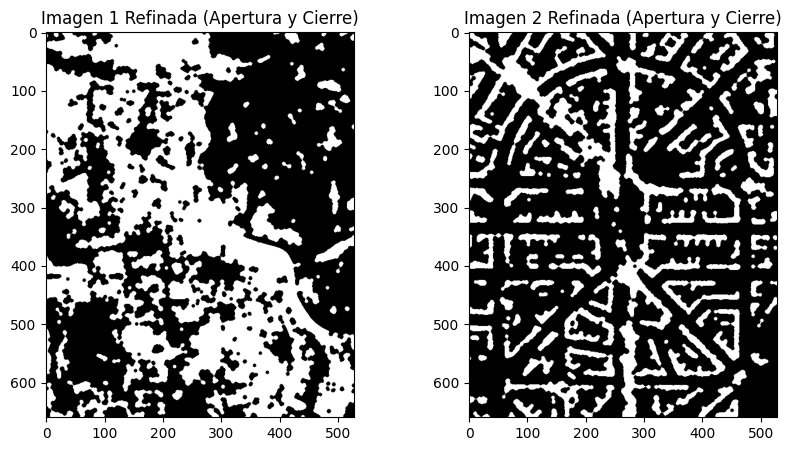

In [19]:

# 4. Morfología matemática: Apertura y Cierre
opened_img1 = morphology.opening(binary_img1, morphology.disk(3))
closed_img1 = morphology.closing(opened_img1, morphology.disk(3))

opened_img2 = morphology.opening(binary_img2, morphology.disk(3))
closed_img2 = morphology.closing(opened_img2, morphology.disk(3))

# Mostrar morfología matemática
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(closed_img1, cmap='gray')
plt.title('Imagen 1 Refinada (Apertura y Cierre)')

plt.subplot(1, 2, 2)
plt.imshow(closed_img2, cmap='gray')
plt.title('Imagen 2 Refinada (Apertura y Cierre)')

plt.show()